In [1]:
import pandas as pd

In [2]:
sms_data= pd.read_csv("C:/Users/HP/Desktop/DATA analystic/sms_data.csv")
print(sms_data.head())

                            sms_data_id  user_id  sms_id  \
0  624b68b4-3d96-4763-8fca-8cfbafdd945a       64  8212.0   
1  624b68b4-3d96-4763-8fca-8cfbafdd945a       64  8211.0   
2  624b68b4-3d96-4763-8fca-8cfbafdd945a       64  8210.0   
3  624b68b4-3d96-4763-8fca-8cfbafdd945a       64  8209.0   
4  624b68b4-3d96-4763-8fca-8cfbafdd945a       64  8208.0   

                                                body  \
0  INR 6 debited from your YES BANK prepaid card ...   
1  आपके Jio नंबर 9653181533  के प्लान की वैधता जल...   
2  Hey, Save Rs.100 extra on groceries & more wit...   
3  INR 6 debited from your YES BANK prepaid card ...   
4  INR 6 debited from your YES BANK prepaid card ...   

                         creator                      date  
0  com.samsung.android.messaging  2024-12-20T04:56:38.556Z  
1  com.samsung.android.messaging  2024-12-20T03:50:29.256Z  
2  com.samsung.android.messaging  2024-12-20T03:49:44.705Z  
3  com.samsung.android.messaging  2024-12-20T02:19:05.210Z

In [3]:
import re

# Example SMS message
message = "Debited ₹5000 from A/c XXXX at Big Bazaar. Balance: ₹25000"

# Extract transaction details
amount = re.search(r"₹\d+", message)
merchant = re.search(r"at (.+?)\.", message)
balance = re.search(r"Balance: ₹(\d+)", message)

if amount:
    print("Amount:", amount.group())
if merchant:
    print("Merchant:", merchant.group(1))
if balance:
    print("Balance:", balance.group(1))


Amount: ₹5000
Merchant: Big Bazaar
Balance: 25000


In [4]:
# Categorize based on keywords
categories = {
    "Groceries": ["Big Bazaar", "Grocery Store"],
    "Shopping": ["Amazon", "Flipkart"],
    "Utilities": ["Electricity", "Water"],
}

def categorize_transaction(merchant):
    for category, keywords in categories.items():
        if any(keyword in merchant for keyword in keywords):
            return category
    return "Other"

merchant_name = "Big Bazaar"
category = categorize_transaction(merchant_name)
print("Category:", category)


Category: Groceries


Category
Groceries    5000
Shopping     2500
Name: Amount, dtype: int64


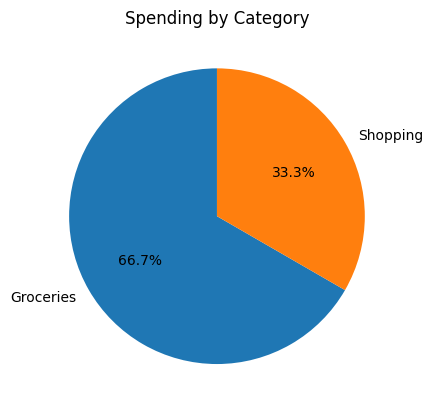

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Example data
data = {
    "Date": ["2024-12-19", "2024-12-18"],
    "Merchant": ["Big Bazaar", "Amazon"],
    "Category": ["Groceries", "Shopping"],
    "Amount": [5000, 2500],
}

df = pd.DataFrame(data)

# Summarize spending by category
summary = df.groupby("Category")["Amount"].sum()
print(summary)

# Plot spending by category
summary.plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("Spending by Category")
plt.ylabel("")  # Remove y-axis label
plt.show()


In [ ]:
import re
import pandas as pd
from googletrans import Translator

# Initialize the Google Translator
translator = Translator()

# Load the CSV file into a DataFrame
df = pd.read_csv('C:/Users/HP/Desktop/DATA analystic/sms_data.csv')

# Ensure all values in the 'body' column are strings and handle NaN values
df['body'] = df['body'].astype(str)

# Translate Hindi messages to English
def translate_to_english(text):
    try:
        # Use the translator to translate text
        translated = translator.translate(text, src='auto', dest='en')
        return translated.text
    except Exception as e:
        # If translation fails, return the original text
        return text

# Apply translation to the 'body' column
df['body_translated'] = df['body'].apply(translate_to_english)

# Function to extract financial details
def extract_details(body):
    # Extract transaction amount
    amount_match = re.search(r"₹\d+", body)
    amount = amount_match.group() if amount_match else None

    # Extract merchant name
    merchant_match = re.search(r"at (.+?)\.", body)
    merchant = merchant_match.group(1) if merchant_match else None

    # Extract account balance
    balance_match = re.search(r"Balance: ₹(\d+)", body)
    balance = balance_match.group(1) if balance_match else None

    return amount, merchant, balance

# Apply the extraction function to the translated 'body_translated' column
df[['Amount', 'Merchant', 'Balance']] = df['body_translated'].apply(
    lambda x: pd.Series(extract_details(x))
)

# Save the updated DataFrame to a new CSV file
df.to_csv('processed_sms_data_with_translation.csv', index=False)

# Print a preview of the updated DataFrame
print(df.head())


In [1]:
import re
import pandas as pd
from googletrans import Translator

# Initialize the Google Translator
translator = Translator()

# Load the CSV file into a DataFrame
try:
    df = pd.read_csv('C:/Users/HP/Desktop/DATA analystic/sms_data.csv')  # Replace 'your_file.csv' with your actual file name
    print("CSV file loaded successfully!")
except FileNotFoundError:
    print("Error: CSV file not found. Please check the file path.")
    exit()

# Ensure all values in the 'body' column are strings and handle NaN values
if 'body' not in df.columns:
    print("Error: 'body' column not found in the CSV file.")
    exit()

df['body'] = df['body'].fillna('').astype(str)  # Replace NaN with an empty string

# Translate Hindi messages to English
def translate_to_english(text):
    try:
        # Use the translator to translate text
        translated = translator.translate(text, src='auto', dest='en')
        return translated.text
    except Exception as e:
        print(f"Translation failed for text: {text}. Error: {e}")
        return text  # Return original text if translation fails

# Apply translation to the 'body' column
print("Translating messages...")
df['body_translated'] = df['body'].apply(translate_to_english)

# Function to extract financial details
def extract_details(body):
    try:
        # Extract transaction amount ₹\d+
        amount_match = re.search(r"Rs. : ₹(\d+)", body)
        amount = amount_match.group() if amount_match else None

        # Extract merchant name
        merchant_match = re.search(r"at (.+?)\.", body)
        merchant = merchant_match.group(1) if merchant_match else None

        # Extract account balance
        balance_match = re.search(r"Balance: ₹(\d+)", body)
        balance = balance_match.group(1) if balance_match else None

        return amount, merchant, balance
    except Exception as e:
        print(f"Extraction failed for body: {body}. Error: {e}")
        return None, None, None

# Apply the extraction function to the translated 'body_translated' column
print("Extracting financial details...")
df[['Amount', 'Merchant', 'Balance']] = df['body_translated'].apply(
    lambda x: pd.Series(extract_details(x))
)

# Save the updated DataFrame to a new CSV file
output_file = 'processed_sms_data_with_translation.csv'
try:
    df.to_csv(output_file, index=False)
    print(f"Processed data saved to {output_file}")
except Exception as e:
    print(f"Failed to save processed data. Error: {e}")

# Print a preview of the updated DataFrame
print("Preview of the processed data:")
print(df.head())


CSV file loaded successfully!
Translating messages...
Translation failed for text: 50% Daily Data quota used as on 28-Oct-24 15:55. 
Jio Number : 8928859668 
Daily Data quota as per plan : 1 GB 
To know more on how to manage your account through MyJio app, click https://www.youtube.com/watch?v=Sroan2IfkMg 
Dial 1991, to know your current balance, validity, plan details and for exciting recharge plans.. Error: timed out
Translation failed for text: Sent Rs.10.00 from Kotak Bank AC X0603 to rahiss010@okaxis on 28-11-24.UPI Ref 433335658739. Not you, https://kotak.com/KBANKT/Fraud. Error: 'Translator' object has no attribute 'raise_Exception'
Translation failed for text: INR 0.80 is credited to your Account  XXXXXX0603 on 26/11/2024 towards NACH-ECS-IRFC LTD Kotak Bank. Error: 'Translator' object has no attribute 'raise_Exception'
Translation failed for text: Sent Rs.1000.00 from Kotak Bank AC X0603 to mutualfunds.elements@icici on 22-11-24.UPI Ref 432769017726. Not you, https://kotak.com

KeyboardInterrupt: 

In [ ]:
print(df.head())


In [ ]:
try:
    df = pd.read_csv('C:/Users/HP/Desktop/DATA analystic/sms_data.csv')
Error: File not found. Check your file name or path.


In [10]:
import os
print(os.getcwd())


C:\JupyterNB


In [11]:
import pandas as pd

# Replace with the path to the CSV file
file_path = "C:/JupyterNB/processed_sms_data_with_translation.csv"

# Load the file
df = pd.read_csv("C:/JupyterNB/processed_sms_data_with_translation.csv")

print(df.head())


                            sms_data_id  user_id  sms_id  \
0  624b68b4-3d96-4763-8fca-8cfbafdd945a       64  8212.0   
1  624b68b4-3d96-4763-8fca-8cfbafdd945a       64  8211.0   
2  624b68b4-3d96-4763-8fca-8cfbafdd945a       64  8210.0   
3  624b68b4-3d96-4763-8fca-8cfbafdd945a       64  8209.0   
4  624b68b4-3d96-4763-8fca-8cfbafdd945a       64  8208.0   

                                                body  \
0  INR 6 debited from your YES BANK prepaid card ...   
1  आपके Jio नंबर 9653181533  के प्लान की वैधता जल...   
2  Hey, Save Rs.100 extra on groceries & more wit...   
3  INR 6 debited from your YES BANK prepaid card ...   
4  INR 6 debited from your YES BANK prepaid card ...   

                         creator                      date  \
0  com.samsung.android.messaging  2024-12-20T04:56:38.556Z   
1  com.samsung.android.messaging  2024-12-20T03:50:29.256Z   
2  com.samsung.android.messaging  2024-12-20T03:49:44.705Z   
3  com.samsung.android.messaging  2024-12-20T02:19:05.

In [1]:
import pandas as pd
import re
import spacy
from nltk.corpus import stopwords

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Load the CSV file
file_path = "C:/JupyterNB/processed_sms_data_with_translation.csv"  # Replace with the actual file path
df = pd.read_csv("C:/JupyterNB/processed_sms_data_with_translation.csv")

# Ensure the "body" column exists
if "body" not in df.columns:
    raise ValueError("The CSV file must contain a 'body' column.")

# Step 1: Remove irrelevant messages (e.g., promotional texts)
def is_relevant_message(body):
    promotional_keywords = ["cashback", "offer", "valid till"]
    return not any(keyword in str(body).lower() for keyword in promotional_keywords)

df = df[df["body"].apply(is_relevant_message)]

# Step 2: Extract financial details using regex and NLP
def extract_transaction_details(body):
    # Extract transaction amount
    amount = re.search(r"₹[\d,]+", str(body))
    amount = amount.group() if amount else None

    # Extract account balance
    balance = re.search(r"Balance: ₹[\d,]+", str(body))
    balance = balance.group().replace("Balance: ", "") if balance else None

    # Extract payment method
    payment_method = None
    if "UPI" in str(body):
        payment_method = "UPI"
    elif "card" in str(body).lower():
        payment_method = "Card"
    elif "net banking" in str(body).lower():
        payment_method = "Net Banking"

    # Extract merchant name
    merchant = None
    if "at" in str(body):
        merchant_match = re.search(r"at (.+?)\.", str(body))
        if merchant_match:
            merchant = merchant_match.group(1)
    elif "to" in str(body):
        merchant_match = re.search(r"to (.+?) ", str(body))
        if merchant_match:
            merchant = merchant_match.group(1)

    # Extract category using NLP
    doc = nlp(str(body))
    category = None
    for ent in doc.ents:
        if ent.label_ in ["ORG", "PRODUCT", "GPE"]:  # Extract organization/product
            category = ent.text

    return pd.Series([amount, balance, payment_method, merchant, category])

# Apply the extraction function
df[["Amount", "Balance", "Payment Method", "Merchant", "Category"]] = df["body"].apply(extract_transaction_details)

# Step 3: Remove stopwords (optional, for further processing)
stop_words = set(stopwords.words("english"))
df["Cleaned Body"] = df["body"].apply(
    lambda x: " ".join([word for word in str(x).split() if word.lower() not in stop_words])
)

# Save processed data to a new CSV file
output_path = "processed_body.csv"
df.to_csv(output_path, index=False)

# Final DataFrame
print(df.head())


LookupError: 
**********************************************************************
  Resource [93mstopwords[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('stopwords')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/stopwords[0m

  Searched in:
    - 'C:\\Users\\HP/nltk_data'
    - 'C:\\Users\\HP\\AppData\\Local\\Programs\\Python\\Python311\\nltk_data'
    - 'C:\\Users\\HP\\AppData\\Local\\Programs\\Python\\Python311\\share\\nltk_data'
    - 'C:\\Users\\HP\\AppData\\Local\\Programs\\Python\\Python311\\lib\\nltk_data'
    - 'C:\\Users\\HP\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
**********************************************************************


In [3]:
import nltk
print("NLTK is installed and working!")


NLTK is installed and working!


In [3]:
import spacy
nlp = spacy.load("en_core_web_sm")
print("SpaCy model loaded successfully!")

SpaCy model loaded successfully!


In [ ]:
print("Hello")

In [2]:
print("Hello")

Hello
